<a href="https://colab.research.google.com/github/kostaskara21/Predicting_Median_Housing_Prices/blob/main/Predicting_Median_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('housing.csv')

**Data Pre-Processing**

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


As we can tell all variables are quantitative except for ocean_proximity which is categorical


**SCALING**







The mix max scaler takes the range of values ​​(max-min) and transforms each value to belong to a range, usually between 0 and 1


In [ ]:
col_names = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']

In [ ]:
for col in col_names[:-1]:
  data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,NEAR BAY
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,NEAR BAY
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,NEAR BAY
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,NEAR BAY
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,NEAR BAY


**ONE HOT VECTOR ENCODING**

For the data, which are categorical variables (ocean_proximity), we will encode them with one hot vector encoding to get a vector representation..

In [ ]:
data['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


First, we will check our data to see how many unique categories we have


In [ ]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
for d in data['ocean_proximity'].unique():
  print(d)

NEAR BAY
<1H OCEAN
INLAND
NEAR OCEAN
ISLAND


As we can tell we have 5 different categories, so to our data we will add 5 columns, where each one will refer to a specific category of ocean_proximity, eg Ocean_proximity_Near_bay etc. For this we will use the get_dummies() function provided in the pandas library.





In [ ]:
df = pd.DataFrame(data)
print('Original DataFrame')
display(df)
df_encoded = pd.get_dummies(df, dtype = int)
print('\n DataFrame after performing One-hot Encoding')
df_encoded



Original DataFrame


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,NEAR BAY
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,NEAR BAY
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,NEAR BAY
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,NEAR BAY
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,INLAND
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,INLAND
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,INLAND
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,INLAND



 DataFrame after performing One-hot Encoding


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0,1,0,0,0


**FIXING MISSING VALUES**

We will replace the missing value with the media of the each attribute

In order to find the median of one attribute :

The median is the middle value in a set of data. First, organize and order the data from smallest to largest. Divide the number of observations by two to find the midpoint value. Round the number up if there's an odd number of observations and the value in that position is the median. Take the average of the values found above and below that position if the number of observations is even.


In [ ]:
def Find_media(column_name):
    # Sorting without modifying the original list
    sorted_col = sorted(column_name)

    # Find the size of the list
    lenoflist = len(sorted_col)

    # Find the middle index
    middle_ind = lenoflist // 2

    # If the list length is even, take the average of the two middle elements
    if lenoflist % 2 == 0:
        return (sorted_col[middle_ind - 1] + sorted_col[middle_ind]) / 2
    else:
        return sorted_col[middle_ind]  # Correct return for odd-length lists


In [ ]:
data=df_encoded

Now we are checking to see witch values are missing

In [ ]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0


In [ ]:
bedrooms=[]
for d in data['total_bedrooms']:
  bedrooms.append(d)
Find_media(bedrooms)

0.04989137181874612

In [ ]:
data['total_bedrooms'].fillna(0.04989137181874612,inplace=True)

<ipython-input-16-73935d3a3b9d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(0.04989137181874612,inplace=True)


In [ ]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0


**VISUALIZATION**

(array([ 190., 1553., 4564., 1673., 1098., 2887., 6208., 2252.,  183.,
          32.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

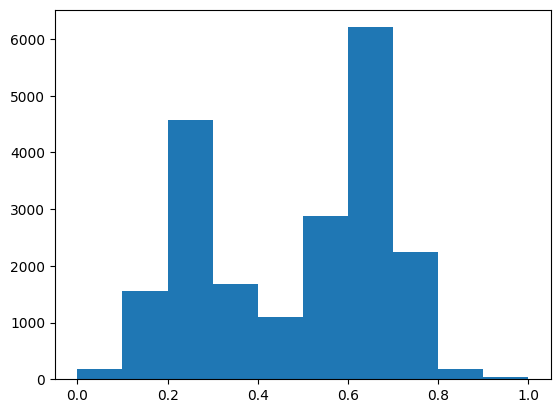

In [ ]:
plt.hist(data['longitude'])

(array([1796., 8987.,  747.,  474., 1292., 4712., 1740.,  490.,  324.,
          78.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

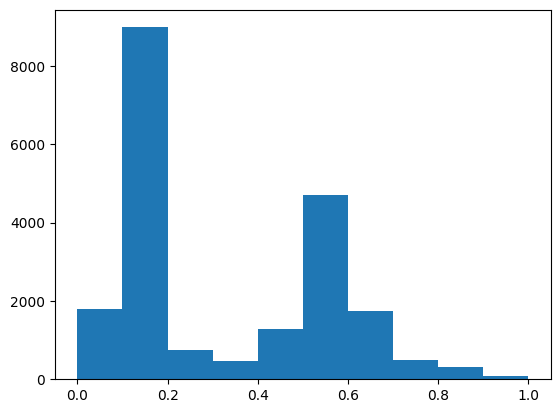

In [ ]:
plt.hist(data['latitude'])

(array([ 719., 1104., 2235., 2681., 2510., 2354., 3555., 1900., 1616.,
        1966.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

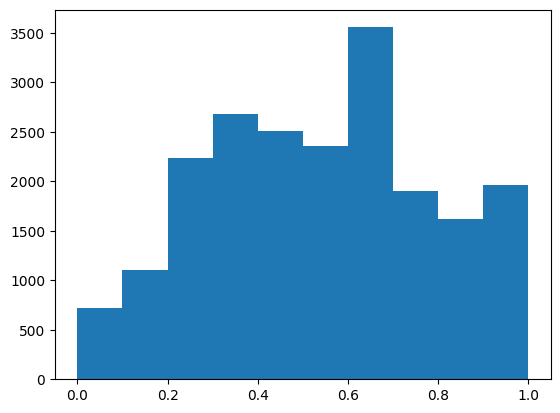

In [ ]:
plt.hist(data['housing_median_age'])

(array([1.7525e+04, 2.5580e+03, 3.7200e+02, 1.0300e+02, 4.9000e+01,
        1.6000e+01, 7.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

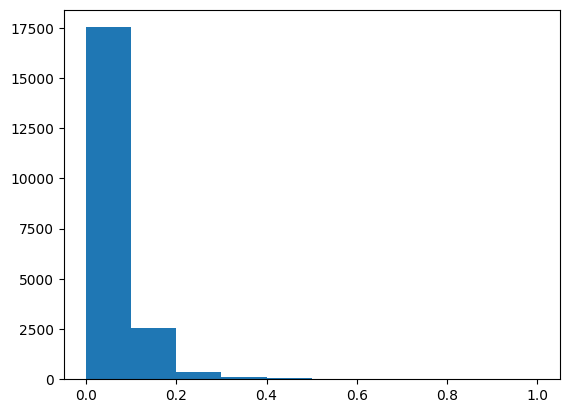

In [ ]:
plt.hist(data['total_rooms'])

(array([1.5511e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

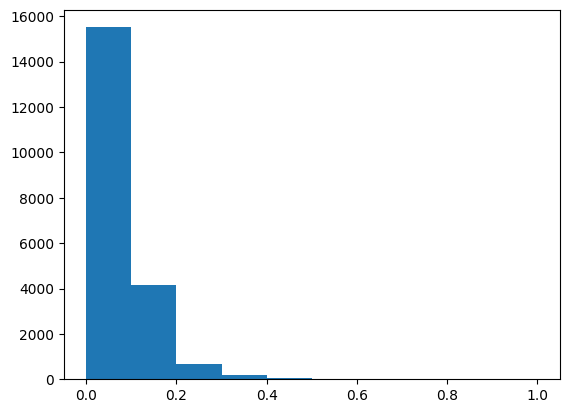

In [ ]:
plt.hist(data['total_bedrooms'])

(array([1.9816e+04, 7.1100e+02, 9.5000e+01, 1.2000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

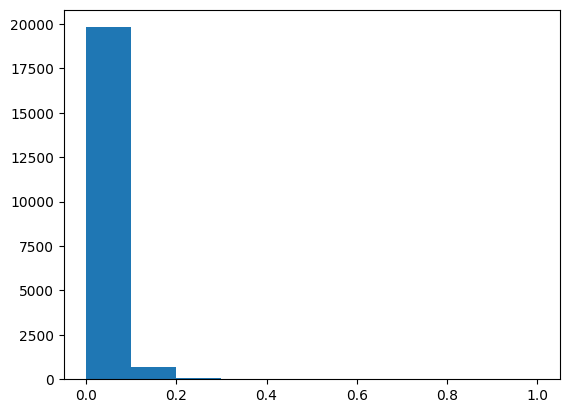

In [ ]:
plt.hist(data['population'])

(array([1.5581e+04, 4.1440e+03, 6.5000e+02, 1.5900e+02, 5.9000e+01,
        2.3000e+01, 1.3000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

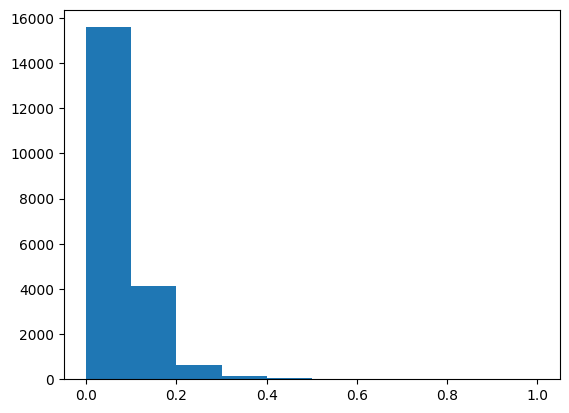

In [ ]:
plt.hist(data['households'])

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

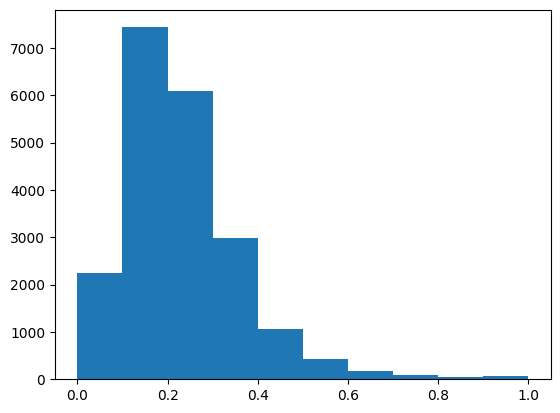

In [ ]:
plt.hist(data['median_income'])

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

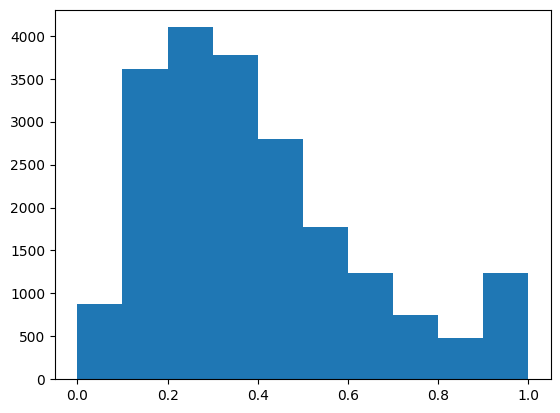

In [ ]:
plt.hist(data['median_house_value'])

(array([2.290e+03, 0.000e+00, 9.136e+03, 0.000e+00, 0.000e+00, 6.551e+03,
        0.000e+00, 2.658e+03, 0.000e+00, 5.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

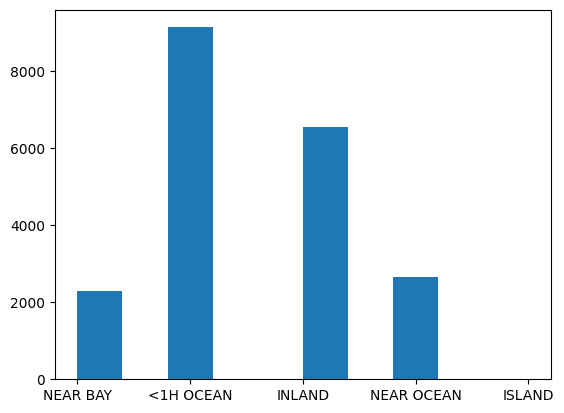

In [ ]:
plt.hist(df['ocean_proximity']) #We are using thr dataframe before encoding

In [ ]:
data['ocean_proximity_ISLAND'].sum() #The amount of the ones in that column thats the total value

5


Now we will create 2D graphs of data that  represent combinations of 2, 3 or even 4 variables ex:

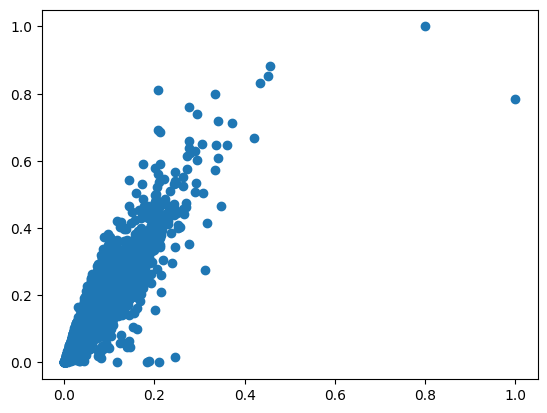

In [ ]:
plt.scatter(data['population'],data['households'])

Looking at the graph, we csn  understand that the larger the population in the suburb, the more households

In [ ]:
df1=df_encoded.iloc[:,:-5]

In [ ]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713


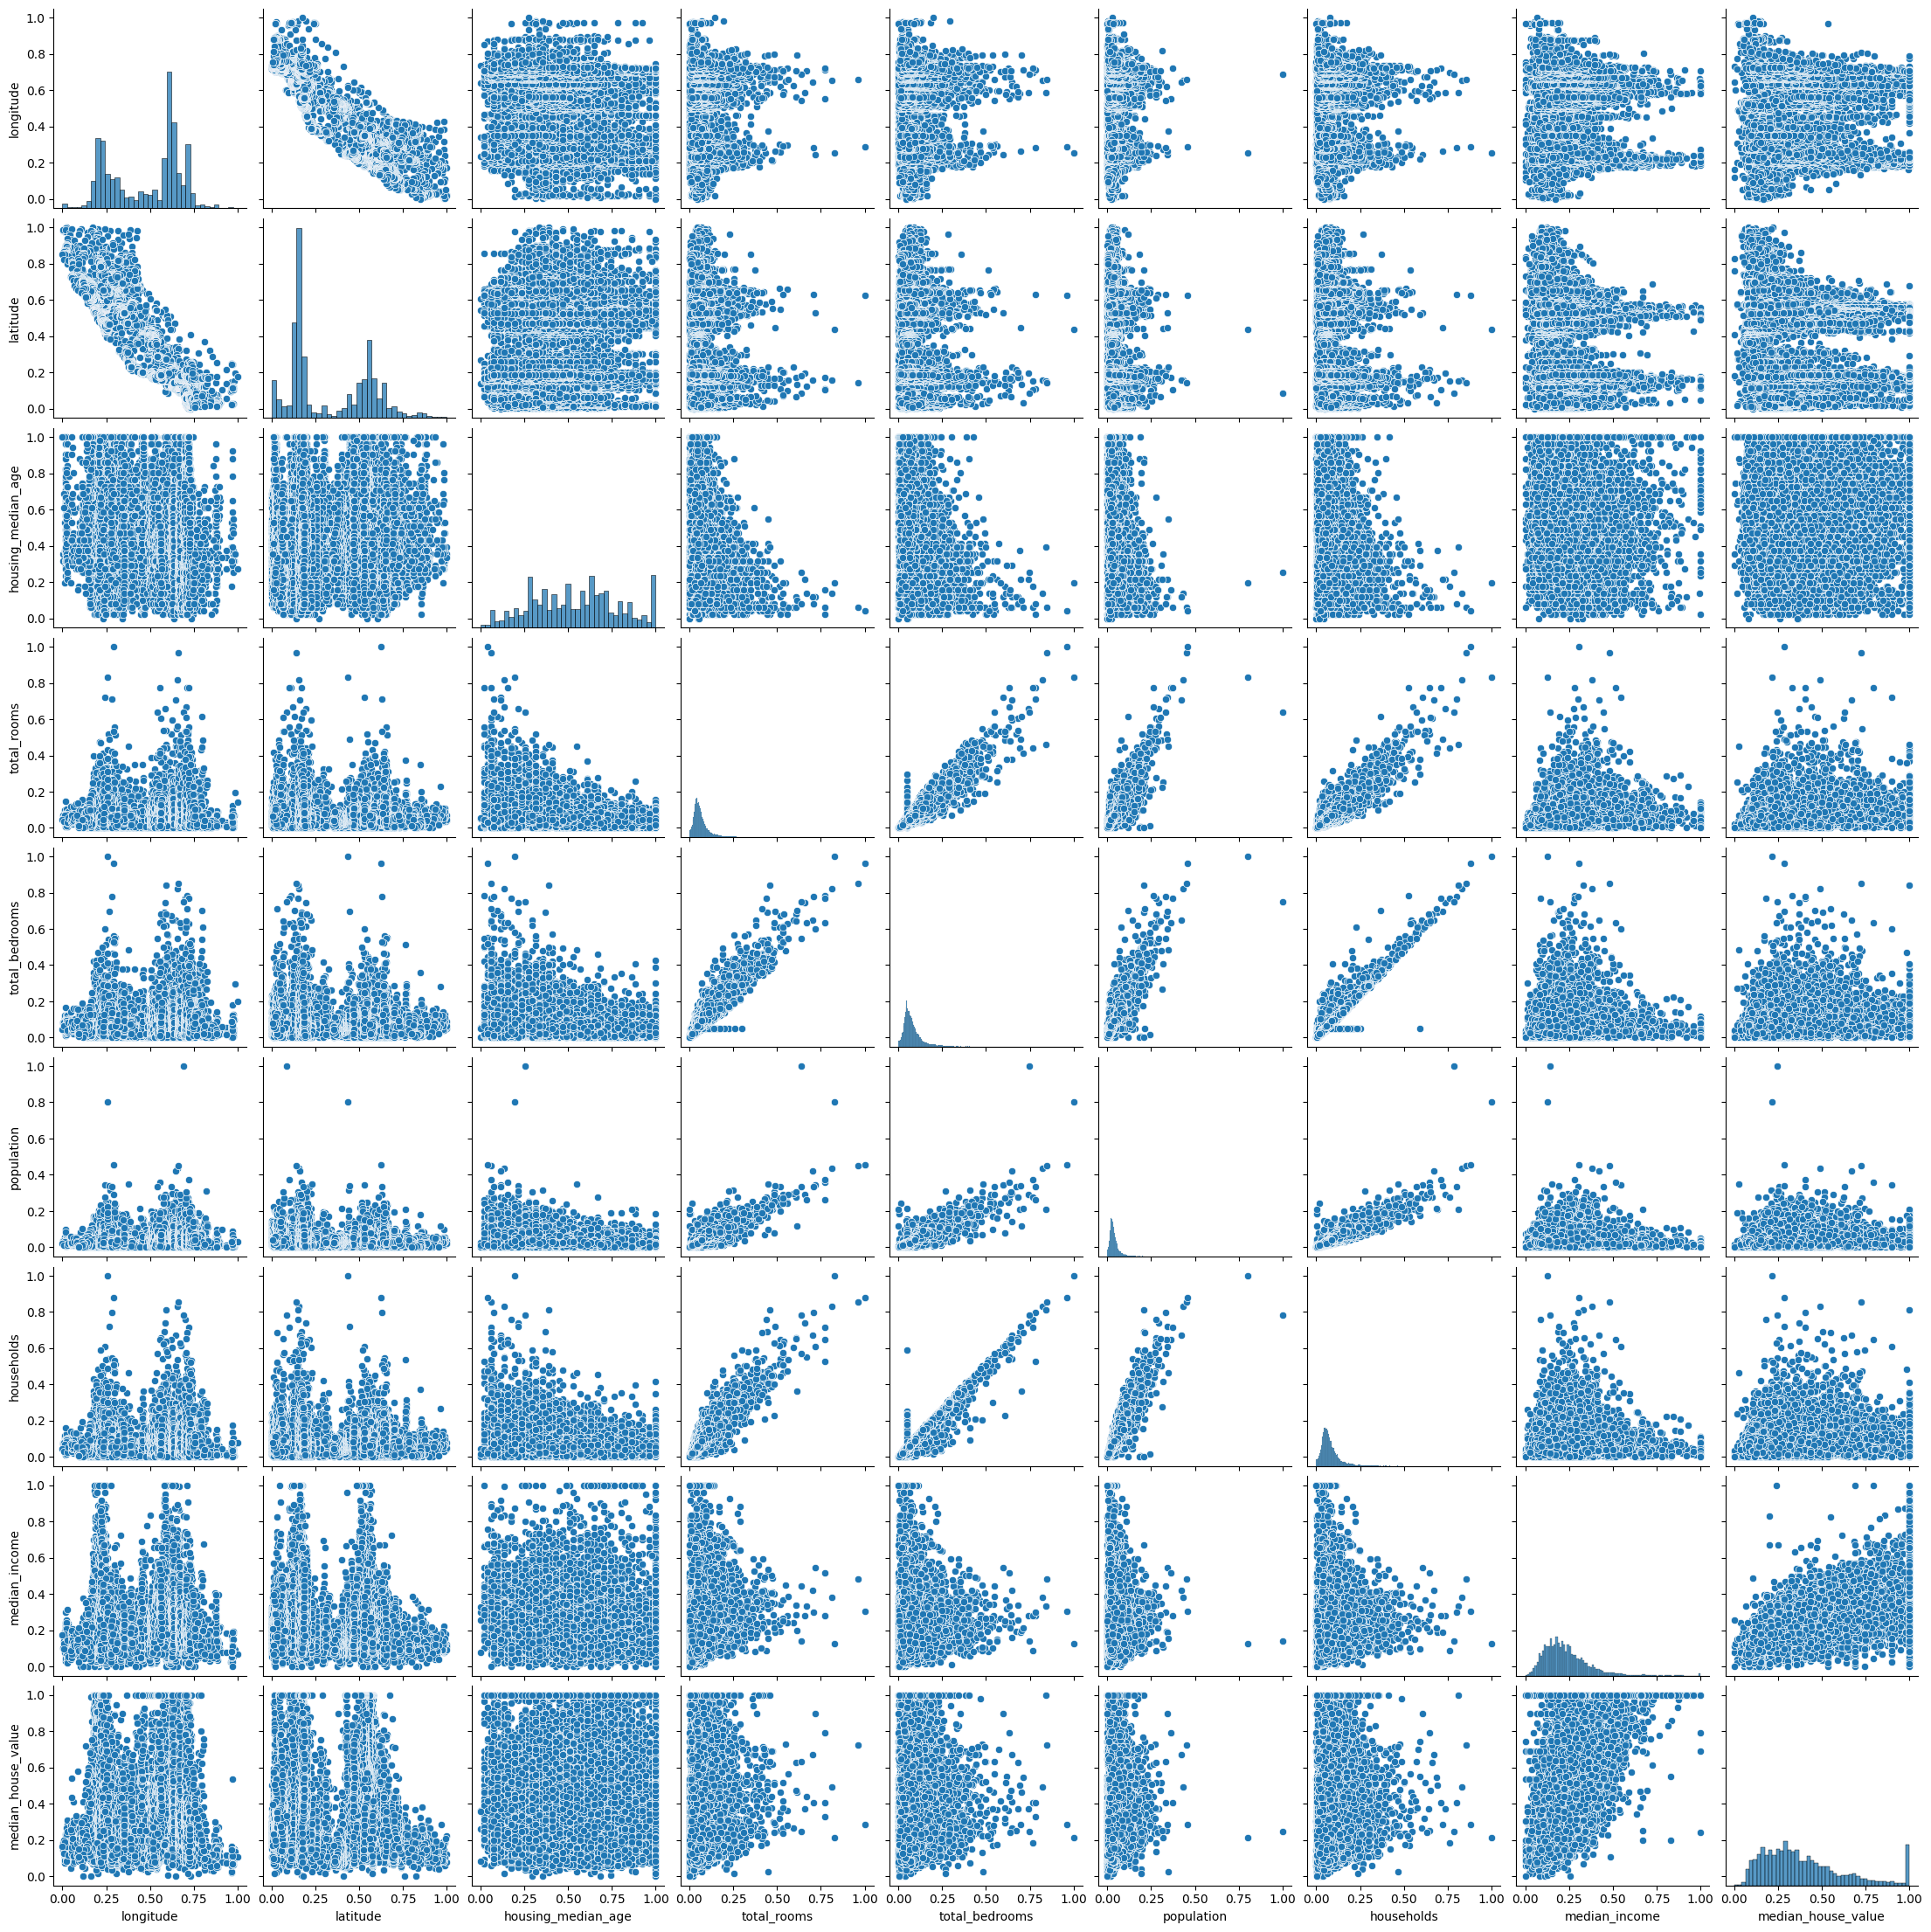

In [ ]:
sns.pairplot(df1)
plt.show()

In [ ]:
correlation_matrix = df1.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068920 -0.066248           -0.318839     0.926213   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068920    0.099773    0.055310      -0.015176   
latitude                 -0.066248   -0.108785   -0.071035      -0.079809   
housing_

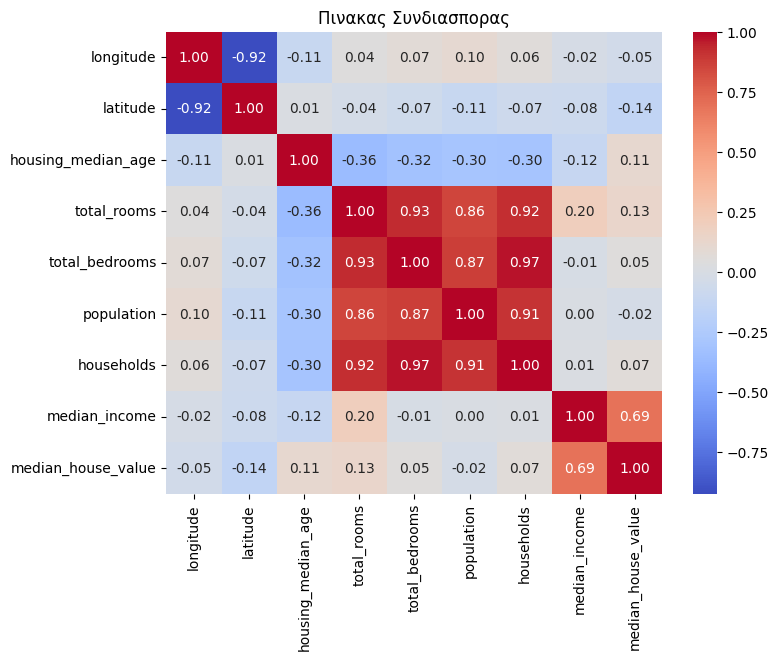

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt=".2f")
plt.title('Πινακας Συνδιασπορας')
plt.show()

From the correlation matrix, we can see that median house value is most strongly linked to median income (0.688), meaning higher-income areas tend to have more expensive houses. There is also a small negative link between latitude and house value (-0.144), which might indicate that houses in the south are more expensive. Also, total rooms, total bedrooms, population, and households are closely related, which makes sense since bigger communities have more housing and people. Lastly, older neighborhoods tend to have fewer rooms (-0.361) on average.


**Data Regression**

**Implementation of the Perceptron Algorithm (Binary Classification) for Linear Discriminant Function**

In this task, I am implementing the Perceptron Algorithm to create a linear discriminant function of the form g:  R<sup>𝑙</sup> → {-1, +1},  where 𝑙
 represents the dimension of the feature space. The objective is to train the model to classify data based on this function. To achieve this, a suitable threshold is considered, which is based on the median house value. This threshold is used to divide the continuous range of house values into two distinct sets, enabling the problem to be approached as a binary classification task. The final goal is to correctly categorize data points into these two classes using the Perceptron algorithm.

In [ ]:
values=[]
for d in data['median_house_value']:
  values.append(d)
Find_media(values)

0.33958829035756555

If a data point's value exceeds the threshold, it is classified as -1, whereas values below or equal to the threshold are assigned to class 1.

In [ ]:
categories = []
for v in data['median_house_value']:
  if v > 0.33958829035756555 :
    categories.append(1)
  else:
    categories.append(-1)

In [ ]:
data['median_house_value'].head()

,median_house_value
0,0.902266
1,0.708247
2,0.695051
3,0.672783
4,0.674638


In [ ]:
categories[:5]

[1, 1, 1, 1, 1]

In [ ]:
len(categories)

20640

In [ ]:
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0,1,0,0,0


In [ ]:
features_for_perceptron = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

In [ ]:
X = df_encoded[features_for_perceptron].to_numpy()

In [ ]:
X

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.        , 1.        ,
        0.        ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.        , 1.        ,
        0.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
epochs = 100

In [ ]:
type(X)

numpy.ndarray

In [ ]:
features = X
labels = categories

In [ ]:
def perceptron_train(features,labels):

  #Initializing our weights with 0
  w = np.zeros(features.shape[1]+1) # The weight vector w is initialized as a 1-row, 13-column vector, matching the number of features in our dataset

  for epoch in range(epochs):
        for vector, label in zip(features, labels):
            vector = np.insert(vector,0,1) #In the position 0 we assign the value  1 , f(x) = w0*1 + x1*w1 + .... + x13*w13
            y = np.dot(w, vector.transpose()) #y = f(x) = (w0,w1,...w13)*(1,x1,x2,..x13)
            if (y > 0):
              target = 1
            else:
              target = -1

            delta = (label - target)

            if delta != 0: # misclassified
                #update our w
                w += label * vector

  return w

In [ ]:
def perceptron_test(features,labels,w):
  er=0
  for vector, label in zip(features, labels):

      vector = np.insert(vector,0,1)
      y = np.dot(w, vector.transpose()) #y = f(x) = (w0,w1,...w13)*(1,x1,x2,..x13)
      if (y > 0):
        target = 1
      else:
        target = -1

      delta = (label - target)

      if delta != 0: # misclassified
          er+=1

  #print(f"Test error count: {er}")
  return er

In [ ]:
w = perceptron_train(X,categories)

In [ ]:
w

array([  4.        ,  -8.54482072, -10.12858661,  -0.19607843,
        19.371789  ,  -2.77801055, -21.41368872,  -2.03206709,
         9.55690956,   1.        ,   0.        ,   0.        ,
         2.        ,   1.        ])

To evaluate the performance of the trained Perceptron, we iterate through each feature vector using the learned weight vector w to check the misclassified datas

In [ ]:
er=0
for vector, label in zip(features, labels):
    vector = np.insert(vector,0,1)
    y = np.dot(w, vector.transpose()) #y = f(x) = (w0,w1,...w13)*(1,x1,x2,..x13)
    if (y > 0):
      target = 1
    else:
      target = -1

    delta = (label - target)

    if delta != 0: # misclassified
      er+=1

In [ ]:
er

4109

In [ ]:
errors=perceptron_test(X,categories,w)

Test error count: 4109


In [ ]:
errors

4109

And we can see that the Test gives us same results

In [ ]:
y= np.array(categories)

The data is split into 10 equal parts the model is trained on 9 folds and tested on the remaining 1 part. This process is repeated 10 times, with each fold serving as the test set once. The final performance metric is the average of the results from all 10 iterations, giving a more accurate and trustworthy estimate of how well the model performs.

In [ ]:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits=10, shuffle=True, random_state=40) #shuffle true τα ανακατευει

In [ ]:
sum_errors = 0
for train_index, val_index in k_folds.split(X):
    X_train, y_train  = X[train_index],y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    w = perceptron_train(X_train,y_train)
    errors =  perceptron_test(X_val,y_val,w)
    sum_errors += errors/len(y_val)
    print(errors/len(y_val))
print('Average. false',sum_errors/10)

0.24224806201550386
0.22625968992248063
0.3071705426356589
0.26453488372093026
0.24563953488372092
0.23401162790697674
0.23982558139534885
0.2311046511627907
0.2761627906976744
0.29893410852713176
Average. false 0.2565891472868217


The average error of around 25% which indicates that the data may not follow a linear relationship.  If the data were truly linear, a model like a perceptron would have 0 error

**Implementation of the Least Squares Algorithm (Linear Regression) for Continuous Prediction**

In this task, I am implementing the Least Squares Algorithm to create a linear regression model of the form g: R<sup>𝑙</sup> → R, where 𝑙 represents the dimension of the feature space.

In [ ]:
X = X[:,:-5]

Due to the one-hot encoding of categorical variables, the last five columns in the dataset made the  feature matrix non-invertible during the Least Squares calculation. By removing them we successfully implemented the algorithm.


In [ ]:
X.shape

(20640, 8)

In [ ]:
ones = np.ones((X.shape[0],1))

In [ ]:
ones.shape

(20640, 1)

In [ ]:
X = np.concatenate((ones,X),axis=1)

In [ ]:
X.shape

(20640, 9)

In [ ]:
y = df1['median_house_value'].values

In [ ]:
y

array([0.90226638, 0.70824656, 0.69505074, ..., 0.15938285, 0.14371281,
       0.15340349])

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

sum_mse = 0
sum_mae = 0
for train_index, val_index in k_folds.split(X):
  X_train, y_train  = X[train_index],y[train_index]
  X_val, y_val = X[val_index], y[val_index]
  #lms(train - finding the w)
  XT_X = np.dot(X_train.T,X_train)
  XT_X_inverse = np.linalg.inv(XT_X)
  XT_X_inverse_XT = np.dot(XT_X_inverse,X_train.T)
  w = np.dot(XT_X_inverse_XT,y_train)
  #lms(prediction)
  y_pred = np.dot(X_val,w)
  mse = mean_squared_error(y_pred,y_val)
  sum_mse +=mse
  mae = mean_absolute_error(y_pred,y_val)
  sum_mae += mae
  print('Least squared error: ',mse,' Mean Absolute Error ',mae)

print('Mean of the Mean Squared Error: ',sum_mse/10,'Mean of the Mean Absolute Error: ',sum_mae/10)

Least squared error:  0.021091637075439873  Mean Absolute Error  0.1052932487069759
Least squared error:  0.020851838135790172  Mean Absolute Error  0.10723454030724706
Least squared error:  0.021873333328653308  Mean Absolute Error  0.1081282159272685
Least squared error:  0.02044963155681723  Mean Absolute Error  0.10450806922010773
Least squared error:  0.02147528969437153  Mean Absolute Error  0.1041507119690751
Least squared error:  0.019933998208929757  Mean Absolute Error  0.10449905815810255
Least squared error:  0.02163753645457044  Mean Absolute Error  0.10758201912123563
Least squared error:  0.02027554949985965  Mean Absolute Error  0.10270289358073
Least squared error:  0.02036492170883825  Mean Absolute Error  0.1030580585249166
Least squared error:  0.019083405267676806  Mean Absolute Error  0.10403533367547552
Mean of the Mean Squared Error:  0.020703714093094704 Mean of the Mean Absolute Error:  0.10511921491911347
